#### Set up the Notebook

In [3]:
# Import the Necessary Libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Data Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

#### Importing the Dataset

In [5]:
# Create a variable with the name "data" 
data = pd.read_csv("/kaggle/input/california-housing-prices/housing.csv")

#### Initial Inspection of the Data

In [6]:
# Display the first 10 rows
print("first rows of the data")
data.head(10)

first rows of the data


longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   
5    -122.25     37.85                52.0        919.0           213.0   
6    -122.25     37.84                52.0       2535.0           489.0   
7    -122.25     37.84                52.0       3104.0           687.0   
8    -122.26     37.84                42.0       2555.0           665.0   
9    -122.25     37.84                52.0       3549.0           707.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  
5       413.0       193.0         4.0368            269700.0        NEAR BAY  
6      1094.0       514.0         3.6591            299200.0        NEAR BAY  
7      1157.0       647.0         3.1200            241400.0        NEAR BAY  
8      1206.0       595.0         2.0804            226700.0        NEAR BAY  
9      1551.0       714.0         3.6912            261100.0        NEAR BAY

In [7]:
# Display the last few rows
print("last few rows")
data.tail(10)

last few rows


longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
20630    -121.32     39.29                11.0       2640.0           505.0   
20631    -121.40     39.33                15.0       2655.0           493.0   
20632    -121.45     39.26                15.0       2319.0           416.0   
20633    -121.53     39.19                27.0       2080.0           412.0   
20634    -121.56     39.27                28.0       2332.0           395.0   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
20630      1257.0       445.0         3.5673            112000.0   
20631      1200.0       432.0         3.5179            107200.0   
20632      1047.0       385.0         3.1250            115600.0   
20633      1082.0       382.0         2.5495             98300.0   
20634      1041.0       344.0         3.7125            116800.0   
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

      ocean_proximity  
20630          INLAND  
20631          INLAND  
20632          INLAND  
20633          INLAND  
20634          INLAND  
20635          INLAND  
20636          INLAND  
20637          INLAND  
20638          INLAND  
20639          INLAND

In [9]:
# Check the total of rows and columns of the dataframe
num_rows, num_columns = data.shape

print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

Number of rows: 20640
Number of columns: 10


In [10]:
# Get the information about the data types,missing values, and memory of usage
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


#### Summary Statistics

In [11]:
# Generate summary statistics for numeric columns
data.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

In [12]:
# Include non-numerical values for the statistical analysis
data.describe(include='all')

longitude      latitude  housing_median_age   total_rooms  \
count   20640.000000  20640.000000        20640.000000  20640.000000   
unique           NaN           NaN                 NaN           NaN   
top              NaN           NaN                 NaN           NaN   
freq             NaN           NaN                 NaN           NaN   
mean     -119.569704     35.631861           28.639486   2635.763081   
std         2.003532      2.135952           12.585558   2181.615252   
min      -124.350000     32.540000            1.000000      2.000000   
25%      -121.800000     33.930000           18.000000   1447.750000   
50%      -118.490000     34.260000           29.000000   2127.000000   
75%      -118.010000     37.710000           37.000000   3148.000000   
max      -114.310000     41.950000           52.000000  39320.000000   

        total_bedrooms    population    households  median_income  \
count     20433.000000  20640.000000  20640.000000   20640.000000   
unique             NaN           NaN           NaN            NaN   
top                NaN           NaN           NaN            NaN   
freq               NaN           NaN           NaN            NaN   
mean        537.870553   1425.476744    499.539680       3.870671   
std         421.385070   1132.462122    382.329753       1.899822   
min           1.000000      3.000000      1.000000       0.499900   
25%         296.000000    787.000000    280.000000       2.563400   
50%         435.000000   1166.000000    409.000000       3.534800   
75%         647.000000   1725.000000    605.000000       4.743250   
max        6445.000000  35682.000000   6082.000000      15.000100   

        median_house_value ocean_proximity  
count         20640.000000           20640  
unique                 NaN               5  
top                    NaN       <1H OCEAN  
freq                   NaN            9136  
mean         206855.816909             NaN  
std          115395.615874             NaN  
min           14999.000000             NaN  
25%          119600.000000             NaN  
50%          179700.000000             NaN  
75%          264725.000000             NaN  
max          500001.000000             NaN

#### Calculate the percentage of Missing values

In [13]:
missing_percentage = (data.isnull().sum().sum() / (data.shape[0] * data.shape[1])) * 100

print(f"Percentage of missing values: {missing_percentage:.2f}%")

Percentage of missing values: 0.10%


In [14]:
# Get the total amount of missing values
total_missing_values = data.isnull().sum().sum()

print(f"Total missing values: {total_missing_values}")

Total missing values: 207


#### Data Cleaning Process

In [16]:
# Get all the Missing values of each column
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [17]:
# Calculate the total amount of Missing values
data.isnull().sum().sum()

207

- It seems like the only column with Missing values is 'total_bedrooms'

In [18]:
# Get rid of the Missing values of the column "total_bedrooms"
data['total_bedrooms'].fillna(0, inplace=True)

In [21]:
# Corroborate the total amount of Missing values
data.isnull().sum().sum()

0

In [22]:
# Calculate the correlation matrix of numerical values

# Select only the numeric columns
numeric_data = data.select_dtypes(include='number')

# Calculate the correlation matrix for numeric columns
correlation_matrix = numeric_data.corr()

# Display the correlation matrix
print(correlation_matrix)


                    longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924664           -0.108197     0.044568   
latitude            -0.924664  1.000000            0.011173    -0.036100   
housing_median_age  -0.108197  0.011173            1.000000    -0.361262   
total_rooms          0.044568 -0.036100           -0.361262     1.000000   
total_bedrooms       0.068082 -0.065318           -0.317063     0.920196   
population           0.099773 -0.108785           -0.296244     0.857126   
households           0.055310 -0.071035           -0.302916     0.918484   
median_income       -0.015176 -0.079809           -0.119034     0.198050   
median_house_value  -0.045967 -0.144160            0.105623     0.134153   

                    total_bedrooms  population  households  median_income  \
longitude                 0.068082    0.099773    0.055310      -0.015176   
latitude                 -0.065318   -0.108785   -0.071035      -0.079809   
housing_

In [23]:
# Calculate the correlation between 'population' and 'households'
data['population'].corr(data['households'])

0.9072222660959613

#### Histograms and Plots

In [25]:
# Display all the columns
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

<Axes: >

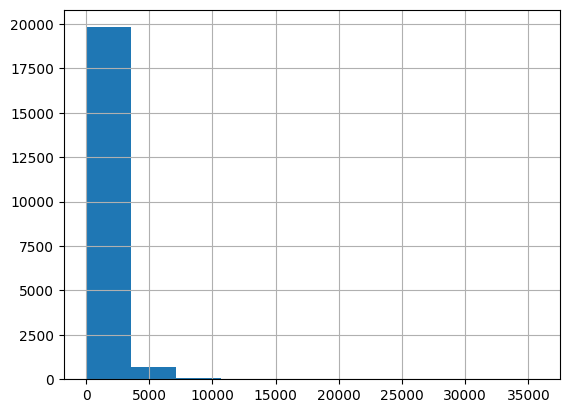

In [26]:
data['population'].hist()

<Axes: >

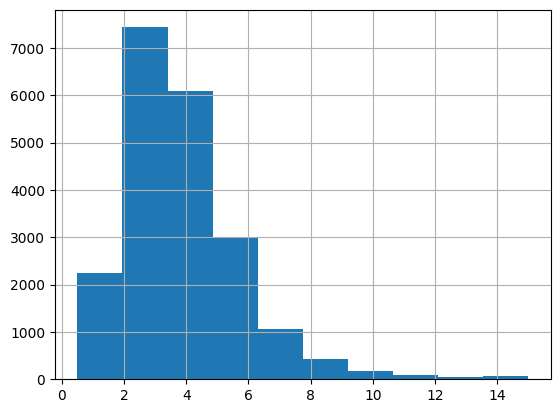

In [27]:
data['median_income'].hist()

<Axes: >

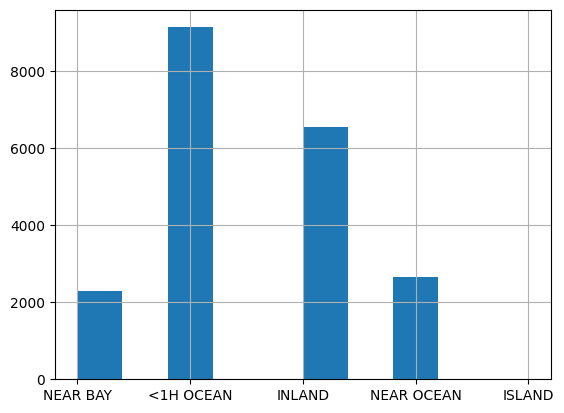

In [28]:
data['ocean_proximity'].hist()

<Axes: >

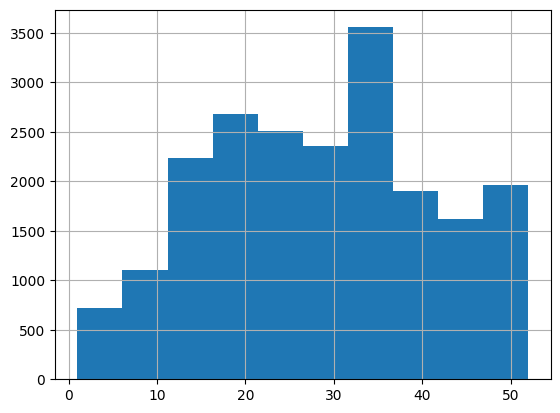

In [29]:
data['housing_median_age'].hist()

<Axes: >

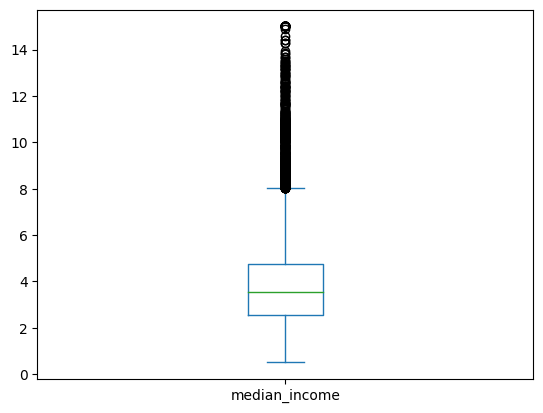

In [32]:
data['median_income'].plot(kind='box')

In [33]:
# Counting the ocurrences of unique values in a categorical column
data['population'].value_counts()

population
891.0     25
761.0     24
1227.0    24
1052.0    24
850.0     24
          ..
2141.0     1
5546.0     1
3186.0     1
3590.0     1
6912.0     1
Name: count, Length: 3888, dtype: int64

#### Grouping and Aggregation:

In [34]:
data.groupby('population')['median_income'].agg(['mean', 'median', 'count'])

mean  median  count
population                        
3.0         0.53600  0.5360      1
5.0         0.53600  0.5360      1
6.0         2.37500  2.3750      1
8.0         2.03125  1.6250      4
9.0         1.08050  1.0805      2
...             ...     ...    ...
15507.0     6.01910  6.0191      1
16122.0     7.49470  7.4947      1
16305.0     4.95160  4.9516      1
28566.0     2.30870  2.3087      1
35682.0     2.57290  2.5729      1

[3888 rows x 3 columns]

#### Check for Duplicates

In [37]:
# Identify duplicated rows.
data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
20635    False
20636    False
20637    False
20638    False
20639    False
Length: 20640, dtype: bool

In [40]:
# Show duplicated rows.
data[data.duplicated()]

Empty DataFrame
Columns: [longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income, median_house_value, ocean_proximity]
Index: []

#### Calculate the Interquartile Range (IQR)

In [42]:

# Select only the numeric columns
numeric_data = data.select_dtypes(include='number')

# Calculate the IQR for each numeric column
Q1 = numeric_data.quantile(0.25)
Q3 = numeric_data.quantile(0.75)
IQR = Q3 - Q1

# Define a criterion for identifying outliers (e.g., values outside 1.5 times the IQR)
outlier_threshold = 1.5

# Identify outliers for each column
outliers = ((numeric_data < (Q1 - outlier_threshold * IQR)) | (numeric_data > (Q3 + outlier_threshold * IQR)))

# Display the rows with outliers in any of the numeric columns
outlier_rows = numeric_data[outliers.any(axis=1)]

# Print the rows with outliers
print(outlier_rows)


       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
89       -122.27     37.80                52.0        249.0            78.0   
95       -122.26     37.80                36.0       5329.0          2477.0   
96       -122.26     37.82                31.0       4596.0          1331.0   
...          ...       ...                 ...          ...             ...   
20544    -121.76     38.55                23.0       8800.0          1857.0   
20563    -121.75     38.67                 9.0      12139.0          2640.0   
20567    -121.79     38.66                15.0       6809.0          1052.0   
20604    -121.54     39.12                17.0       4251.0           899.0   
20629    -121.39     39.12                28.0      10035.0          1856.0   

       population  households  median_income  media

#### Data Visualization

/tmp/ipykernel_32/326118287.py:24: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




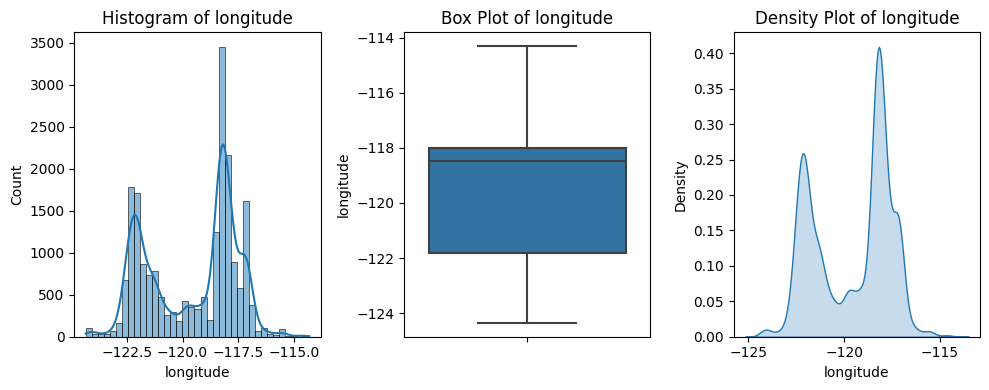

/tmp/ipykernel_32/326118287.py:24: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




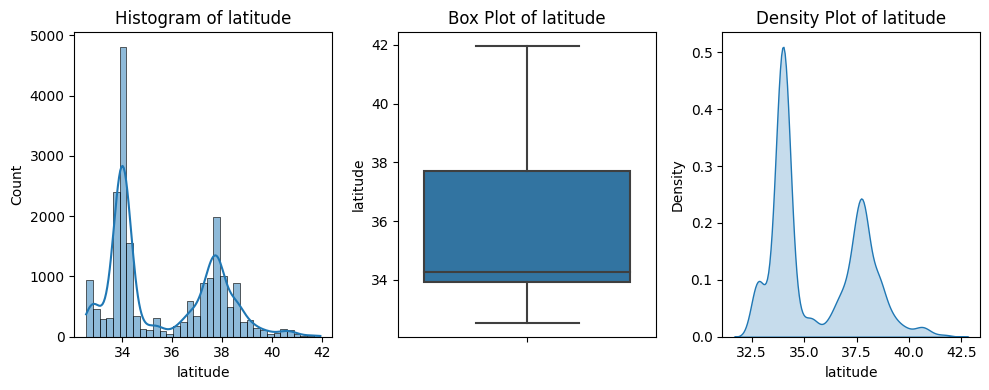

/tmp/ipykernel_32/326118287.py:24: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




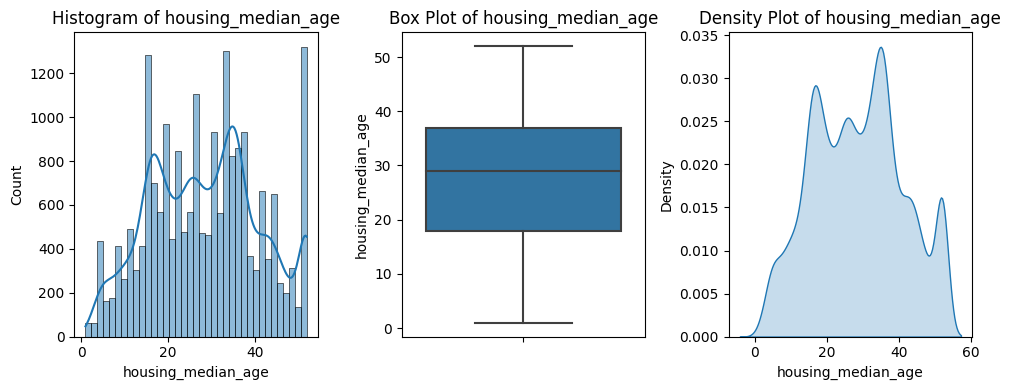

/tmp/ipykernel_32/326118287.py:24: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




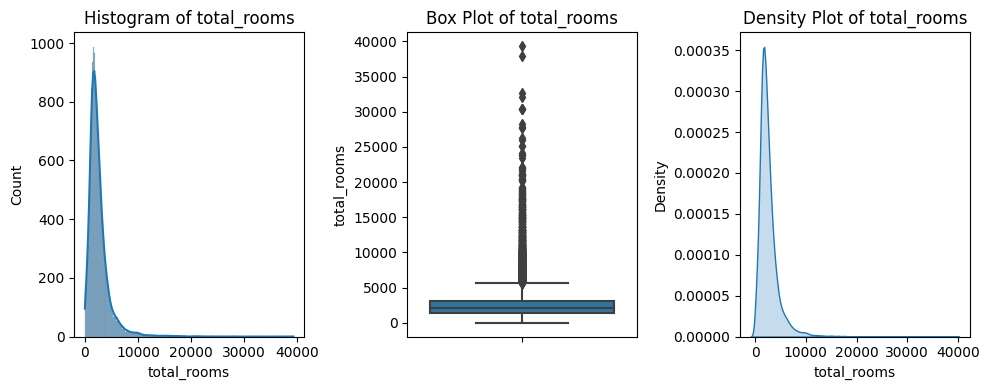

/tmp/ipykernel_32/326118287.py:24: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




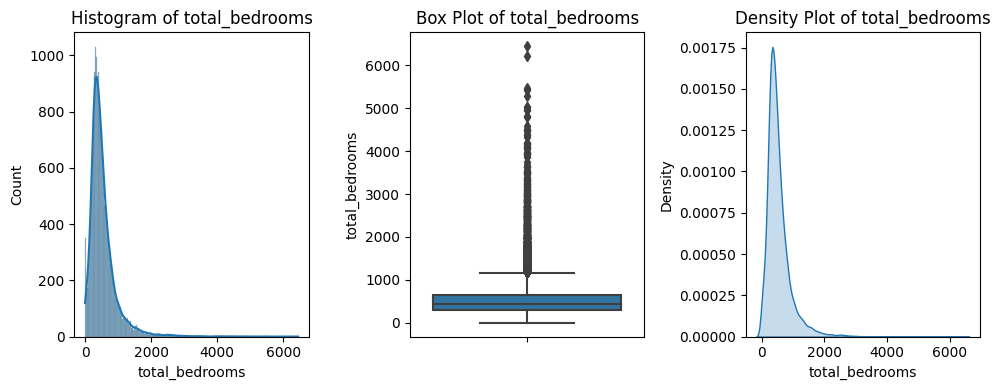

/tmp/ipykernel_32/326118287.py:24: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




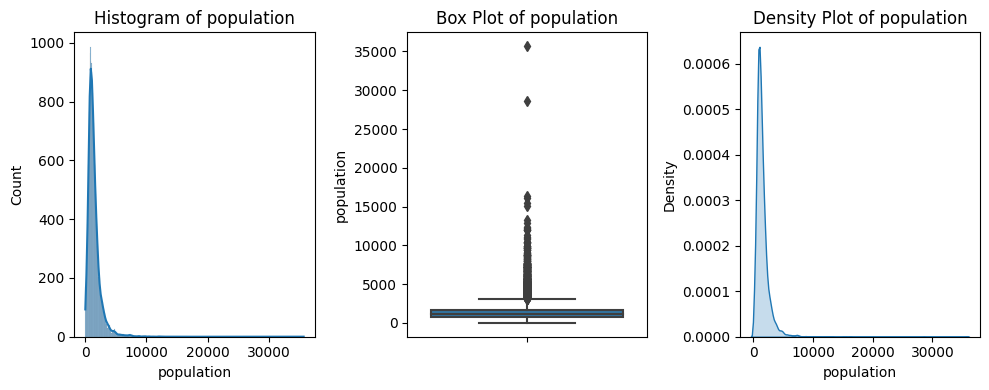

/tmp/ipykernel_32/326118287.py:24: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




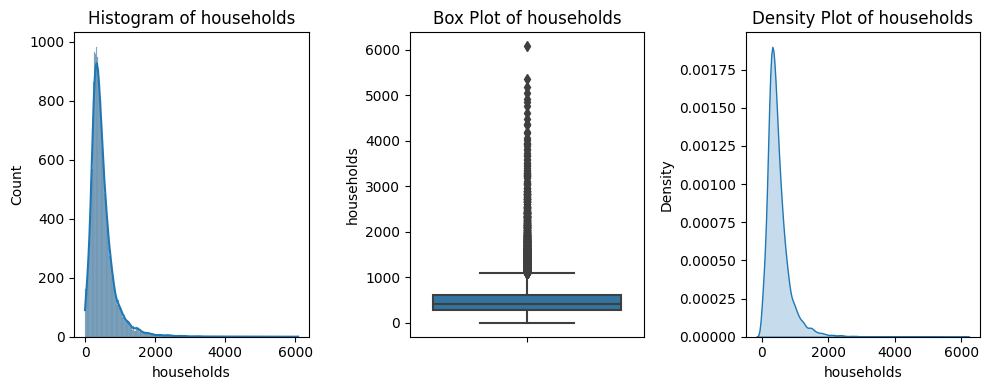

/tmp/ipykernel_32/326118287.py:24: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




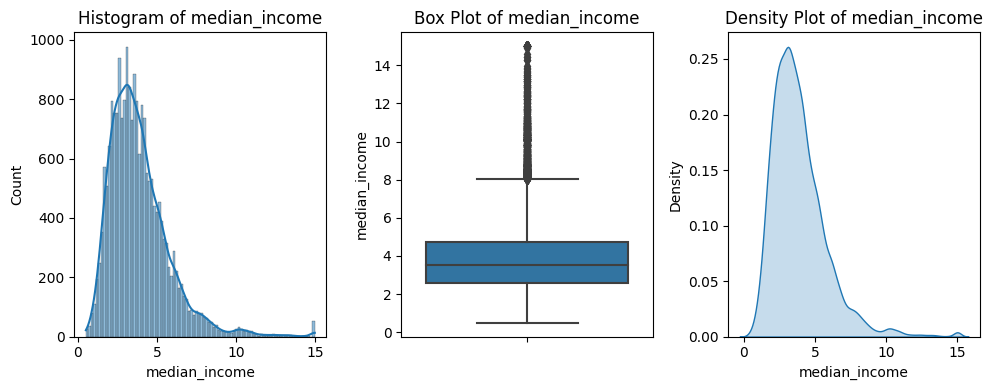

/tmp/ipykernel_32/326118287.py:24: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




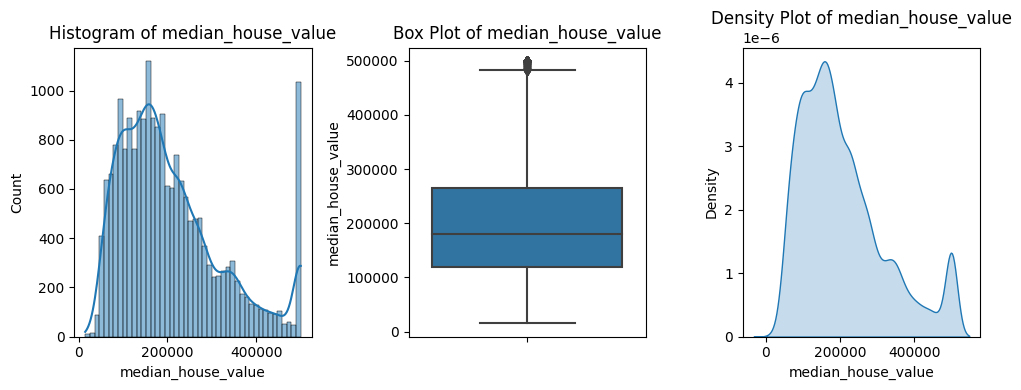

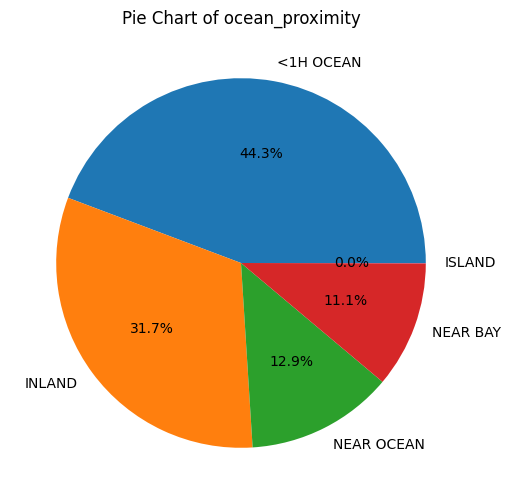

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



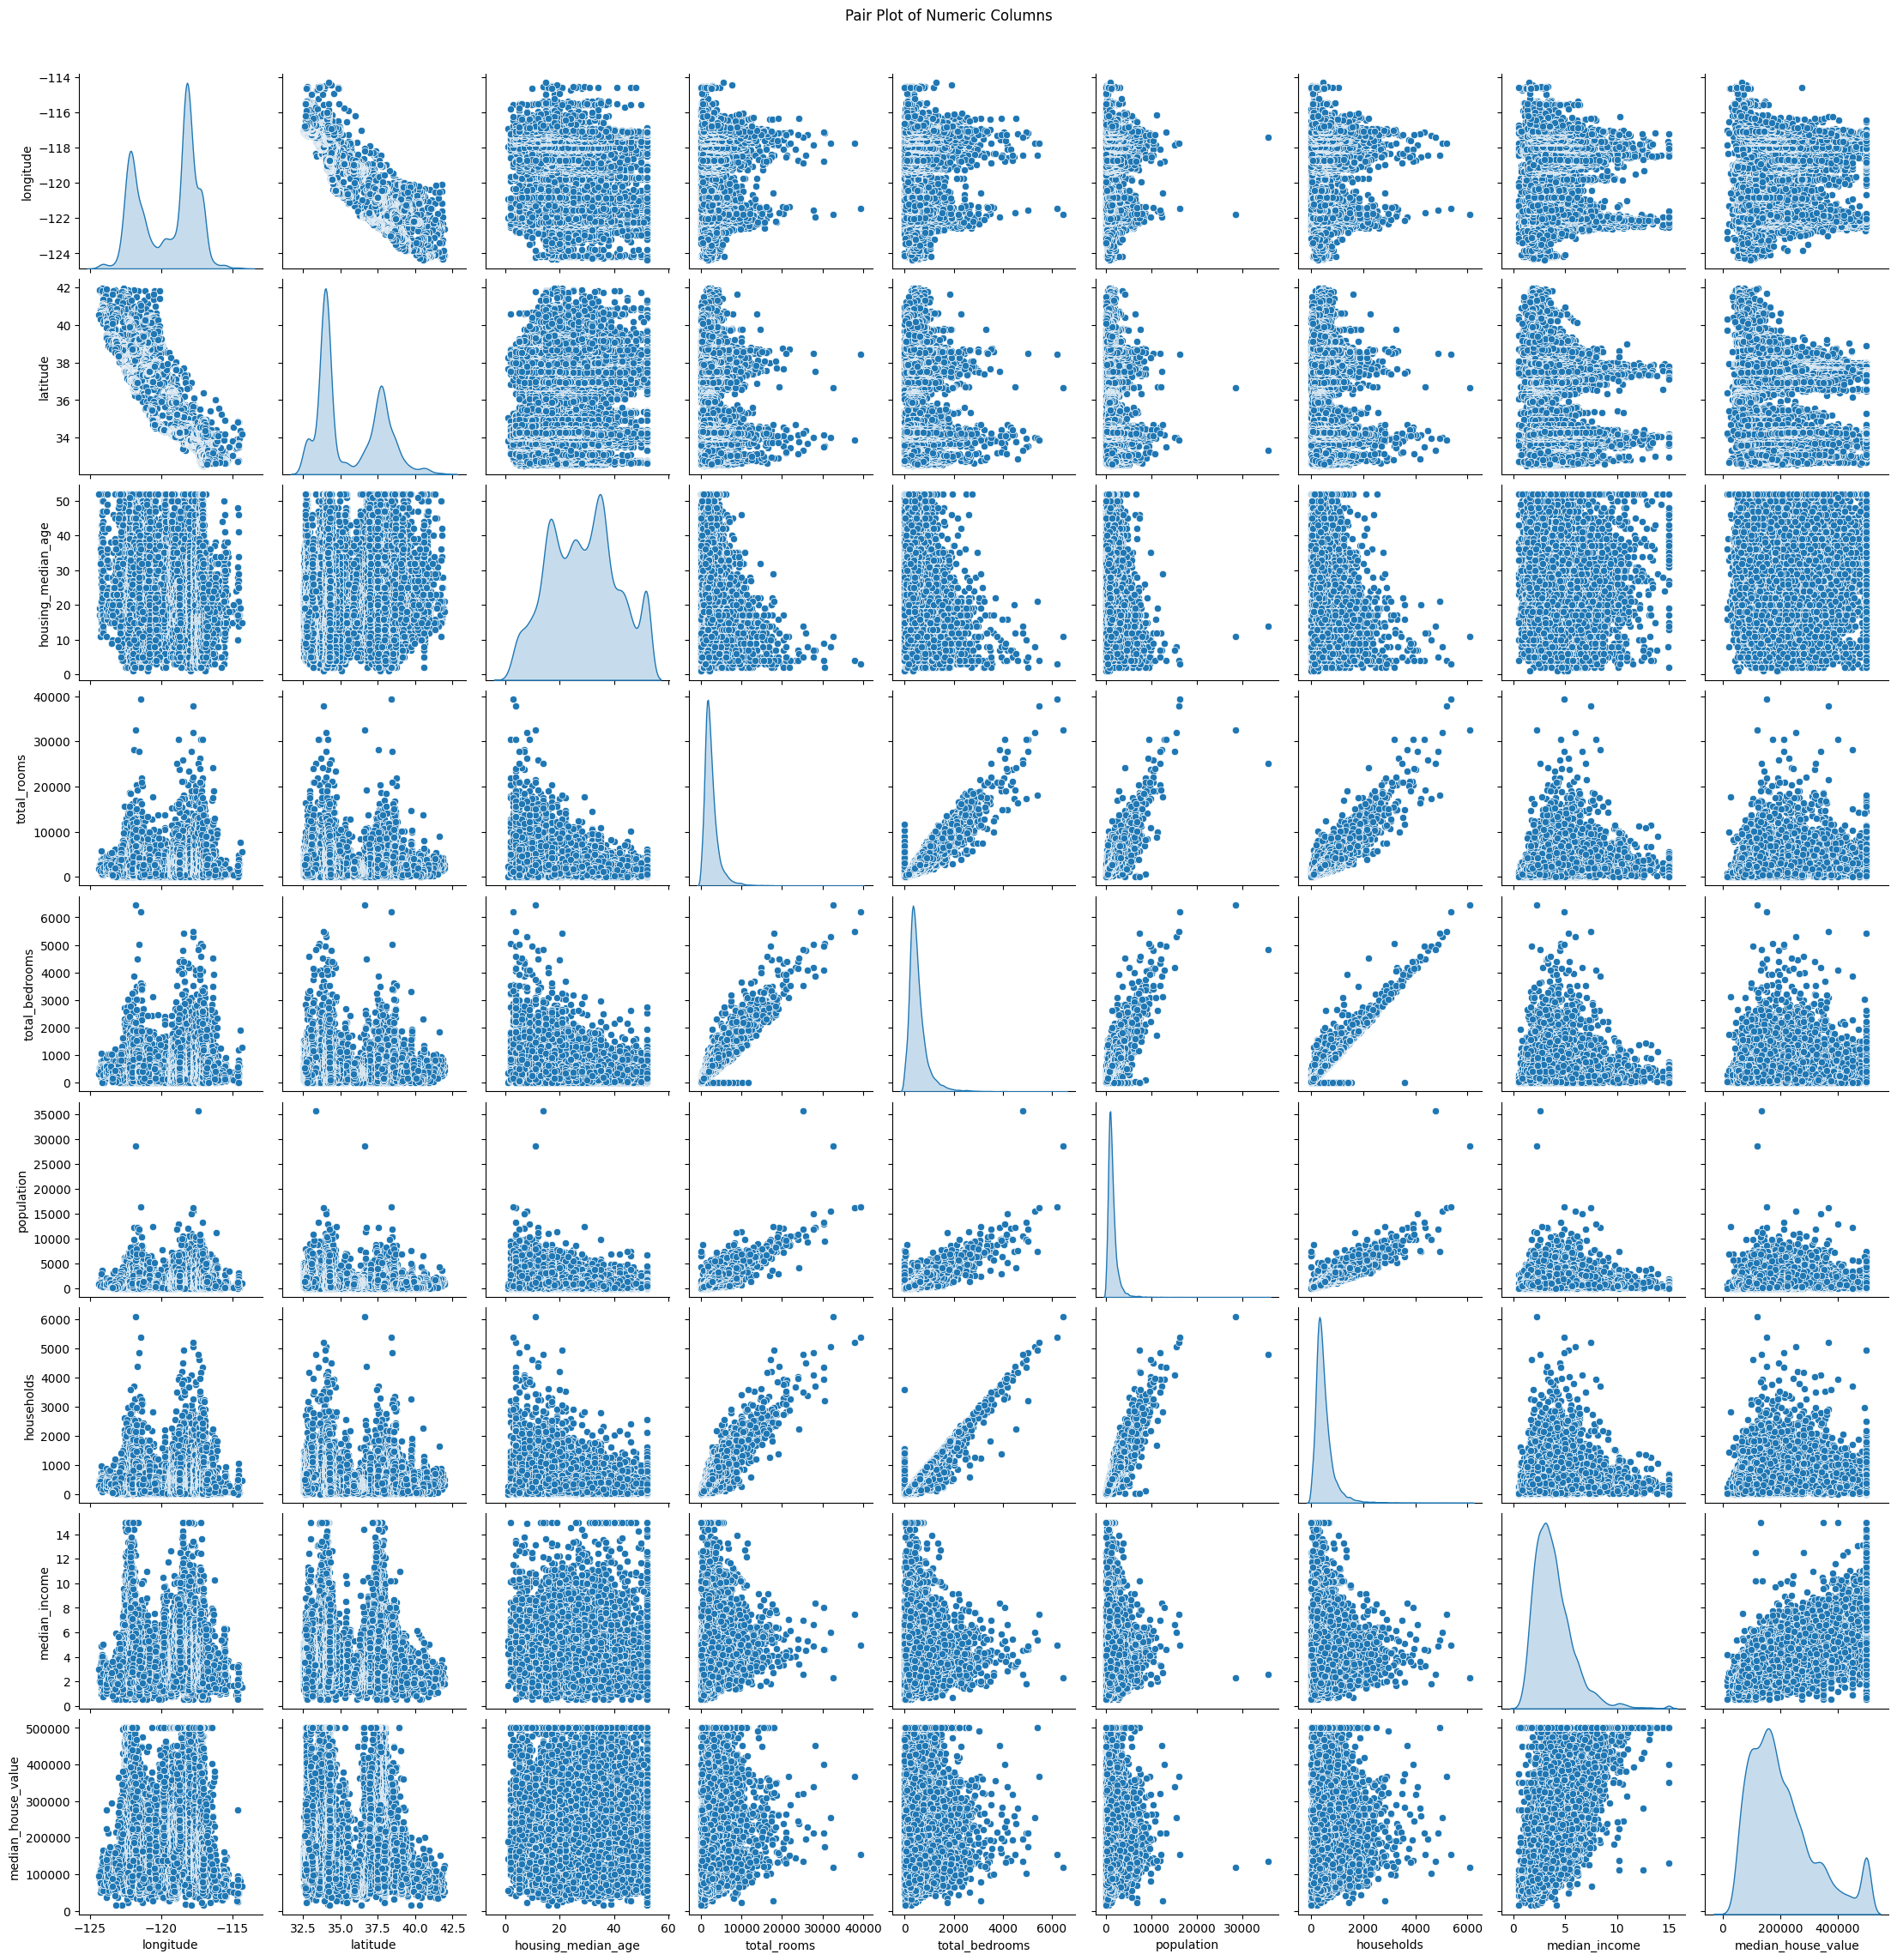

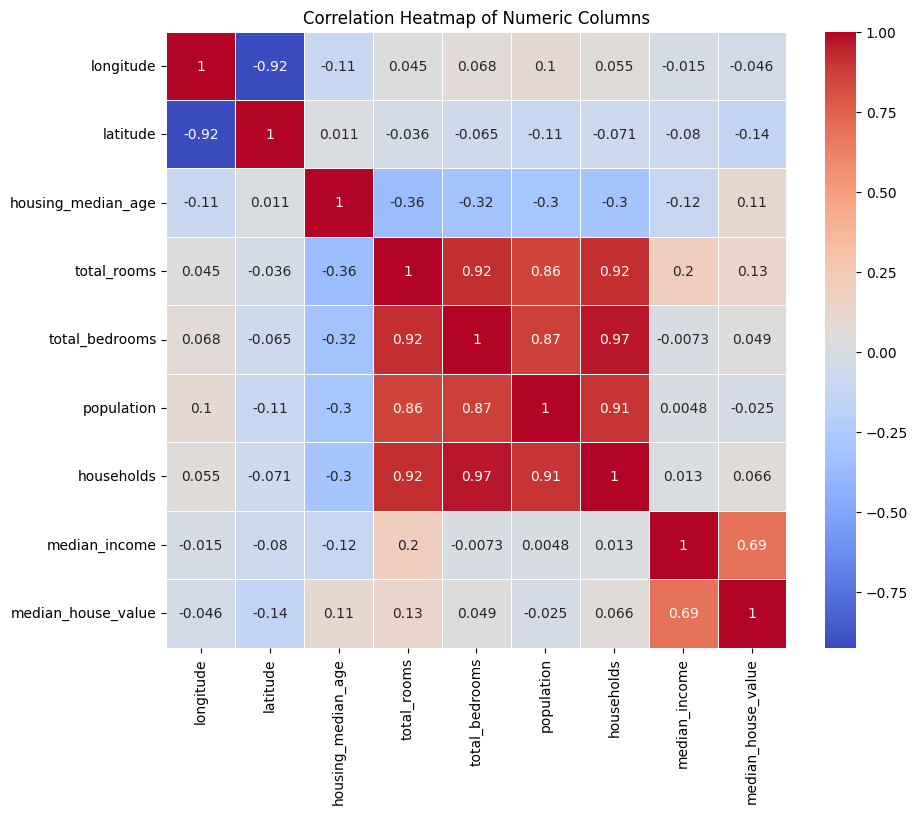

In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

numeric_data = data.select_dtypes(include='number')
categorical_data = data.select_dtypes(exclude='number')

# Histograms, Box Plots, and Density Plots for Numeric Columns
for column in numeric_data.columns:
    plt.figure(figsize=(10, 4))
    
    # Histogram
    plt.subplot(131)
    sns.histplot(data[column], kde=True)
    plt.title(f'Histogram of {column}')
    
    # Box Plot
    plt.subplot(132)
    sns.boxplot(data=data, y=column)
    plt.title(f'Box Plot of {column}')
    
    # Density Plot
    plt.subplot(133)
    sns.kdeplot(data[column], shade=True)
    plt.title(f'Density Plot of {column}')
    
    plt.tight_layout()
    plt.show()

# Bar Plots, Count Plots, and Pie Charts for Categorical Columns
for column in categorical_data.columns:
    if column == 'ocean_proximity':
        plt.figure(figsize=(8, 6))
        data[column].value_counts().plot(kind='pie', autopct='%1.1f%%')
        plt.title(f'Pie Chart of {column}')
        plt.ylabel('')
        plt.show()
    else:
        plt.figure(figsize=(10, 4))
        
        # Bar Plot
        plt.subplot(131)
        data[column].value_counts().plot(kind='bar')
        plt.title(f'Bar Plot of {column}')
        
        # Count Plot
        plt.subplot(132)
        sns.countplot(data=data, x=column)
        plt.title(f'Count Plot of {column}')
        
        # Pie Chart
        plt.subplot(133)
        data[column].value_counts().plot(kind='pie', autopct='%1.1f%%')
        plt.title(f'Pie Chart of {column}')
        plt.ylabel('')
        
        plt.tight_layout()
        plt.show()

# Scatter Plots for Exploring Relationships
sns.pairplot(numeric_data, diag_kind='kde')
plt.suptitle('Pair Plot of Numeric Columns', y=1.02)
plt.show()

# Heatmap to Show Correlations Between Numeric Variables
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Columns')
plt.show()


#### Geographical plot of data points

/tmp/ipykernel_32/3108141223.py:10: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



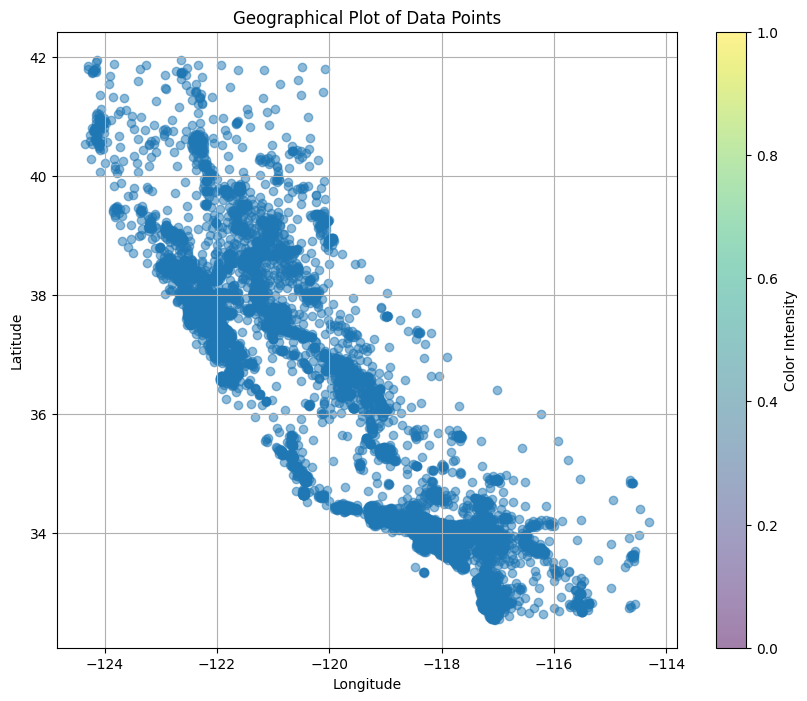

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

latitude = data['latitude']
longitude = data['longitude']

# Create a scatter plot of latitude and longitude
plt.figure(figsize=(10, 8))
plt.scatter(longitude, latitude, alpha=0.5, cmap='viridis')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographical Plot of Data Points')
plt.colorbar(label='Color Intensity')
plt.grid(True)
plt.show()


#### What is the distribution of housing median age?

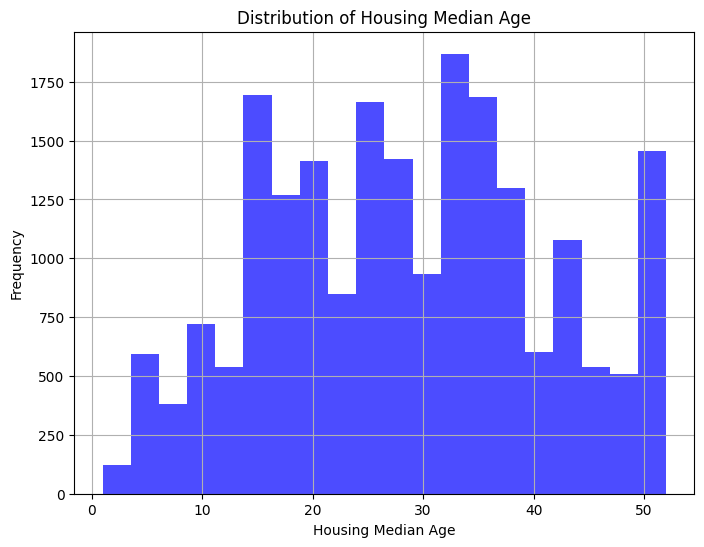

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.hist(data['housing_median_age'], bins=20, color='blue', alpha=0.7)
plt.xlabel('Housing Median Age')
plt.ylabel('Frequency')
plt.title('Distribution of Housing Median Age')
plt.grid(True)
plt.show()


#### How does median house value vary with median income?

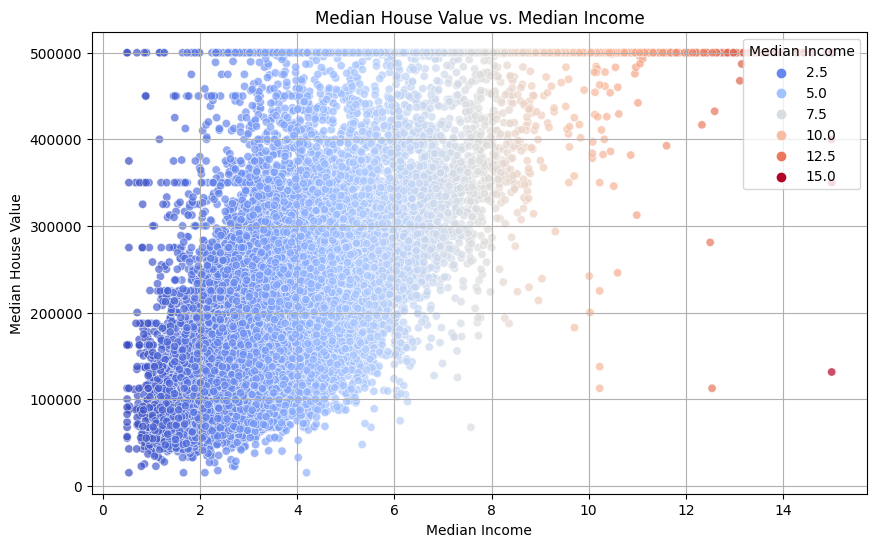

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='median_income', y='median_house_value', hue='median_income', palette='coolwarm', alpha=0.7)
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.title('Median House Value vs. Median Income')
plt.grid(True)
plt.legend(title='Median Income', loc='upper right')
plt.show()


#### What is the relationship between population and the number of households?


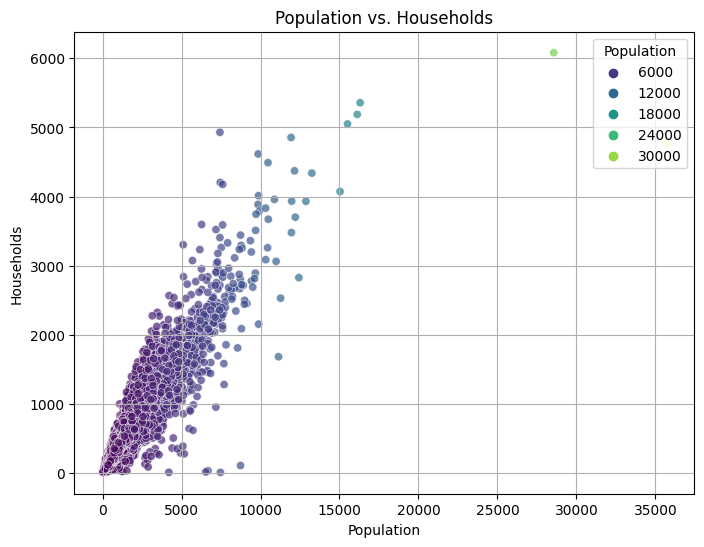

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='population', y='households', hue='population', palette='viridis', alpha=0.7)
plt.xlabel('Population')
plt.ylabel('Households')
plt.title('Population vs. Households')
plt.grid(True)
plt.legend(title='Population', loc='upper right')
plt.show()


#### What is the distribution of total rooms and total bedrooms?


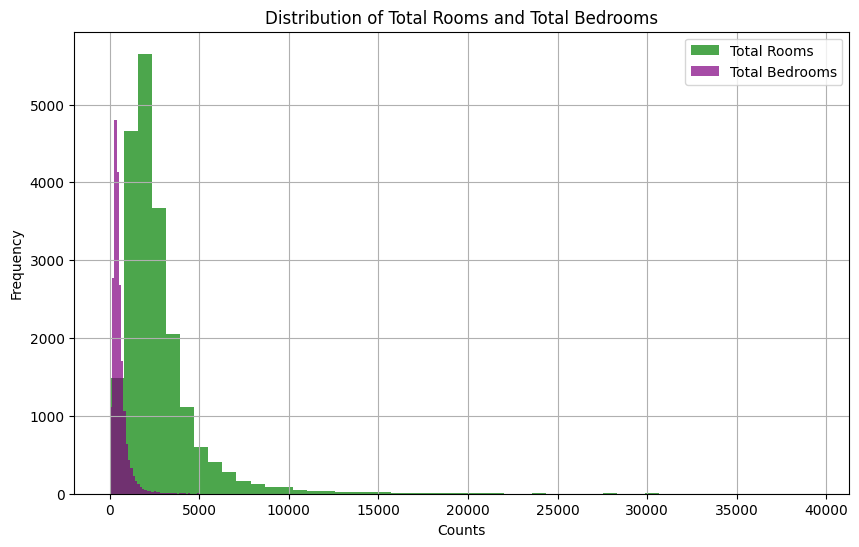

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(data['total_rooms'], bins=50, color='green', alpha=0.7, label='Total Rooms')
plt.hist(data['total_bedrooms'], bins=50, color='purple', alpha=0.7, label='Total Bedrooms')
plt.xlabel('Counts')
plt.ylabel('Frequency')
plt.title('Distribution of Total Rooms and Total Bedrooms')
plt.grid(True)
plt.legend()
plt.show()


#### What is the distribution of ocean proximity categories?


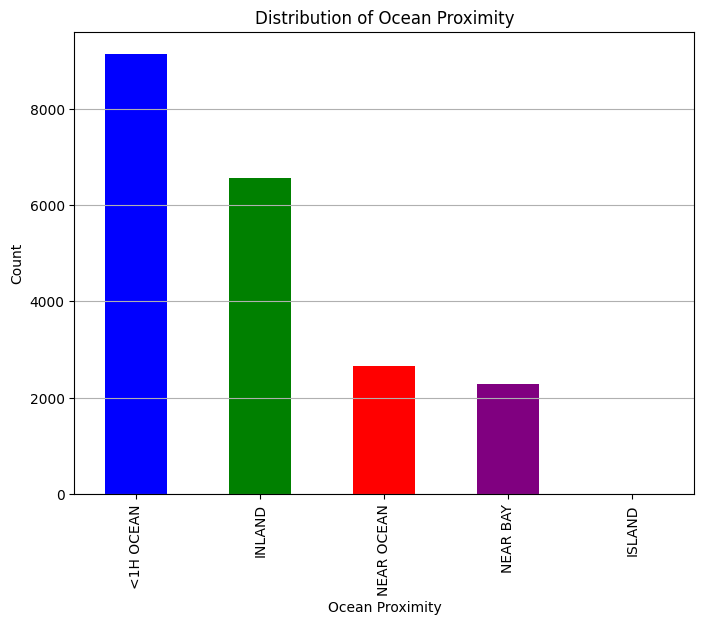

In [54]:
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
data['ocean_proximity'].value_counts().plot(kind='bar', color=['blue', 'green', 'red', 'purple', 'orange'])
plt.xlabel('Ocean Proximity')
plt.ylabel('Count')
plt.title('Distribution of Ocean Proximity')
plt.grid(axis='y')
plt.show()


#### location with the most expensive place to live on a map

In [55]:
most_expensive_place = data[data['median_house_value'] == data['median_house_value'].max()]

print("The most expensive place to live is:")
print(most_expensive_place[['longitude', 'latitude', 'median_house_value']])


The most expensive place to live is:
       longitude  latitude  median_house_value
89       -122.27     37.80            500001.0
459      -122.25     37.87            500001.0
493      -122.24     37.86            500001.0
494      -122.24     37.85            500001.0
509      -122.23     37.83            500001.0
...          ...       ...                 ...
20422    -118.90     34.14            500001.0
20426    -118.69     34.18            500001.0
20427    -118.80     34.19            500001.0
20436    -118.69     34.21            500001.0
20443    -118.85     34.27            500001.0

[965 rows x 3 columns]


In [56]:
import pandas as pd
import folium

most_expensive_place = data[data['median_house_value'] == data['median_house_value'].max()]

# Get latitude and longitude of the most expensive place
latitude = most_expensive_place['latitude'].values[0]
longitude = most_expensive_place['longitude'].values[0]

# Create a map centered at the location
m = folium.Map(location=[latitude, longitude], zoom_start=12)

# Add a marker for the most expensive place
folium.Marker([latitude, longitude], tooltip='Most Expensive Place').add_to(m)

# Display the map
m.save('most_expensive_place.html')  # Save the map to an HTML file


#### Cheapest place to live

In [59]:
import pandas as pd
import plotly.express as px

cheapest_place = data[data['median_house_value'] == data['median_house_value'].min()]

# Create a bar chart
fig = px.bar(
    cheapest_place,
    x='ocean_proximity',
    y='median_house_value',
    text='median_house_value',
    title='Cheapest Place to Live'
)

# Customize the appearance of the plot
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')

# Show the interactive plot
fig.show()


#### Prediction using a linear regression mode

In [65]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

numeric_features = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
                    'total_bedrooms', 'population', 'households', 'median_income']

categorical_features = ['ocean_proximity']

# Select the features (independent variables) and target (dependent variable)
X = data[numeric_features + categorical_features]
y = data['median_house_value']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a preprocessor that handles one-hot encoding for categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Create a pipeline with the preprocessor and Linear Regression model
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

# Fit the model to the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test data
y_pred = pipeline.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")


Mean Squared Error: 5049680190.00
R-squared (R2) Score: 0.61
